# Projeto final de curso

## 1) Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
     

In [6]:
df_chromecast = pd.read_csv(r'C:\Users\Lucas\Downloads\dataset_chromecast.csv')
df_chromecast.shape

(1620529, 4)

In [92]:
df_chromecast["log_bytes_up"] = np.log10(df_chromecast["bytes_up"] + 1)
df_chromecast["log_bytes_down"] = np.log10(df_chromecast["bytes_down"] + 1)


In [16]:
df_smart = pd.read_csv(r'C:\Users\Lucas\Downloads\dataset_smart-tv.csv')
df_smart.shape

(4417903, 4)

In [94]:
df_smart["log_bytes_up"] = np.log10(df_smart["bytes_up"] + 1)
df_smart["log_bytes_down"] = np.log10(df_smart["bytes_down"] + 1)

In [20]:
df_chromecast.shape

(1620529, 6)

## 2) Estatísticas gerais

In [ ]:
# Método de Sturges: bin = ceiling(1+log(n))

In [95]:
def get_bin(data):
    return int(1 + np.log2(len(data)))

###  Média, variância e desvio padrão

In [96]:
#Upload do chromecast
cast_mean_upload = df_chromecast["log_bytes_up"].mean()
cast_var_upload = df_chromecast["log_bytes_up"].var()
cast_std_upload = df_chromecast["log_bytes_up"].std()
print(cast_mean_upload, cast_var_upload, cast_std_upload)

3.3502996618095193 0.45996864629952516 0.6782098836639917


In [97]:
#Upload da smart tv
smart_mean_upload = df_smart["log_bytes_up"].mean()
smart_var_upload = df_smart["log_bytes_up"].var()
smart_std_upload = df_smart["log_bytes_up"].std()
print(smart_mean_upload, smart_var_upload, smart_std_upload)

2.1582882065066804 4.110139344625843 2.0273478597975836


In [98]:
#download do chromecast
cast_mean_download = df_chromecast["log_bytes_down"].mean()
cast_var_download = df_chromecast["log_bytes_down"].var()
cast_std_download = df_chromecast["log_bytes_down"].std()
print(cast_mean_download, cast_var_download, cast_std_download)

3.8000457060383566 1.6638955993658944 1.2899207725150774


In [99]:
#download da smart tv
smart_mean_download = df_smart["log_bytes_down"].mean()
smart_var_download = df_smart["log_bytes_down"].var()
smart_std_download = df_smart["log_bytes_down"].std()
print(smart_mean_download, smart_var_download, smart_std_download)

2.351678620482843 6.721323897352814 2.5925516190334212


### Histogramas

In [100]:
# Chromecast

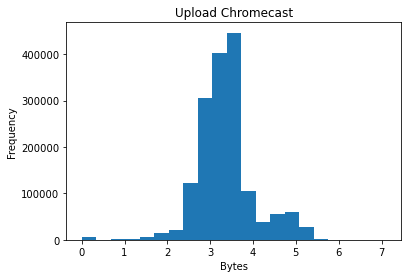

In [101]:
plt.hist(
df_chromecast["log_bytes_up"],
bins = get_bin(df_chromecast["log_bytes_up"]),
)

plt.title('Upload Chromecast')
plt.xlabel("Bytes")
plt.ylabel("Frequency")
plt.show()

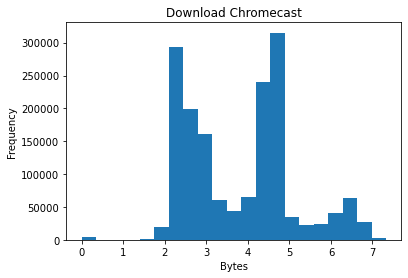

In [102]:
plt.hist(
df_chromecast["log_bytes_down"],
bins = get_bin(df_chromecast["log_bytes_down"]),
)

plt.title('Download Chromecast')
plt.xlabel("Bytes")
plt.ylabel("Frequency")
plt.show()

In [103]:
# Smart TV 

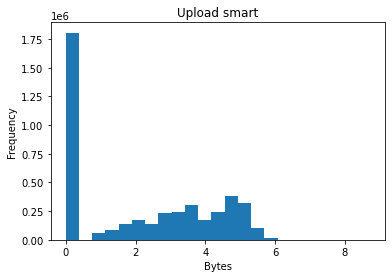

In [104]:
plt.hist(
df_smart["log_bytes_up"],
bins = get_bin(df_smart["log_bytes_up"]),
)

plt.title('Upload smart')
plt.xlabel("Bytes")
plt.ylabel("Frequency")
plt.show()

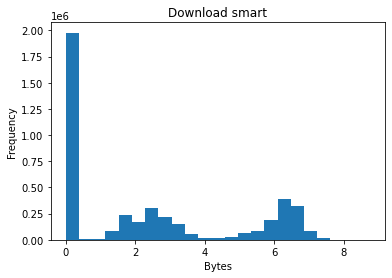

In [105]:
plt.hist(
df_smart["log_bytes_down"],
bins = get_bin(df_smart["log_bytes_down"]),
)

plt.title('Download smart')
plt.xlabel("Bytes")
plt.ylabel("Frequency")
plt.show()

### Empirical Distribution 

In [106]:
# Chromecast

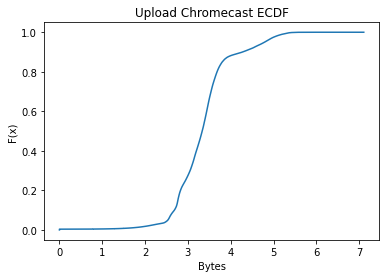

In [107]:
plt.plot(
    df_chromecast["log_bytes_up"].sort_values(),
    np.linspace(0, 1, len(df_chromecast["log_bytes_up"])),
)
plt.title('Upload Chromecast ECDF')
plt.xlabel("Bytes")
plt.ylabel("F(x)")
plt.show()

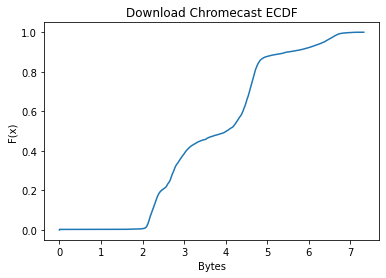

In [108]:
plt.plot(
    df_chromecast["log_bytes_down"].sort_values(),
    np.linspace(0, 1, len(df_chromecast["log_bytes_down"])),
)
plt.title('Download Chromecast ECDF')
plt.xlabel("Bytes")
plt.ylabel("F(x)")
plt.show()

In [109]:
# Smart TV

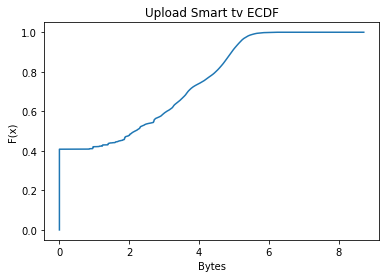

In [110]:
plt.plot(
    df_smart["log_bytes_up"].sort_values(),
    np.linspace(0, 1, len(df_smart["log_bytes_up"])),
)
plt.title('Upload Smart tv ECDF')
plt.xlabel("Bytes")
plt.ylabel("F(x)")
plt.show()

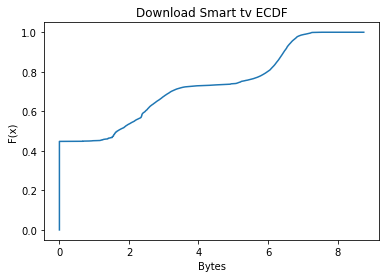

In [111]:
plt.plot(
    df_smart["log_bytes_down"].sort_values(),
    np.linspace(0, 1, len(df_smart["log_bytes_down"])),
)
plt.title('Download Smart tv ECDF')
plt.xlabel("Bytes")
plt.ylabel("F(x)")
plt.show()

### Boxplot

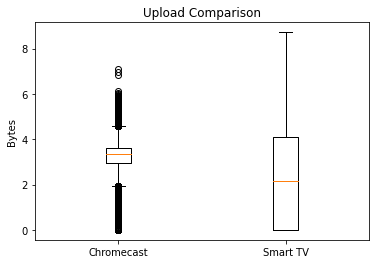

In [112]:
# Chromecast

plt.boxplot(
    [df_chromecast["log_bytes_up"], df_smart["log_bytes_up"]],
    labels=["Chromecast", "Smart TV"],
)
plt.title("Upload Comparison")
plt.ylabel("Bytes")
plt.show()

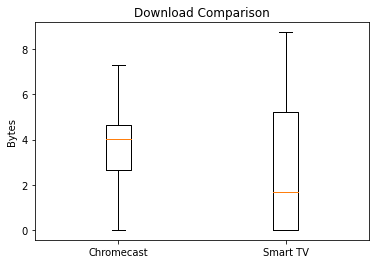

In [113]:
# Download
plt.boxplot(
    [df_chromecast["log_bytes_down"], df_smart["log_bytes_down"]],
    labels=["Chromecast", "Smart TV"],
)
plt.title("Download Comparison")
plt.ylabel("Bytes")
plt.show()

## 3) Estatísticas por Horário

In [114]:
# para cada data e hora extraímos a hora inteira correspondente

df_chromecast["horario_inteiro"] = df_chromecast["date_hour"].apply(lambda x: int(x.split(" ")[1].split(":")[0]))

df_smart["horario_inteiro"] = df_smart["date_hour"].apply(lambda x: int(x.split(" ")[1].split(":")[0]))

### Média, Variância e Desvio Padrão

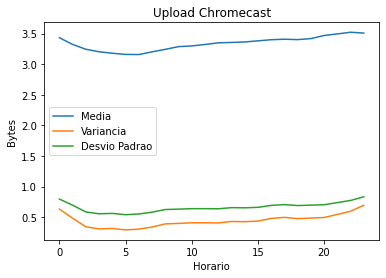

In [115]:
# Grafico Upload Chromecast
plt.title("Upload Chromecast")
plt.xlabel("Horario")
plt.ylabel("Bytes")

plt.plot(
    df_chromecast.groupby("horario_inteiro")["log_bytes_up"].mean(),
    label="Media")
plt.plot(
    df_chromecast.groupby("horario_inteiro")["log_bytes_up"].var(),
    label="Variancia")
plt.plot(
    df_chromecast.groupby("horario_inteiro")["log_bytes_up"].std(),
    label="Desvio Padrao"
)
plt.legend(loc="center left")
plt.show()

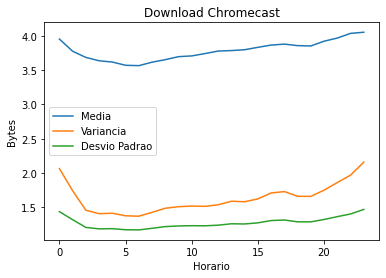

In [116]:
# Grafico Download Chromecast
plt.title("Download Chromecast")
plt.xlabel("Horario")
plt.ylabel("Bytes")

plt.plot(
    df_chromecast.groupby("horario_inteiro")["log_bytes_down"].mean(),
    label="Media")
plt.plot(
    df_chromecast.groupby("horario_inteiro")["log_bytes_down"].var(),
    label="Variancia")
plt.plot(
    df_chromecast.groupby("horario_inteiro")["log_bytes_down"].std(),
    label="Desvio Padrao"
)
plt.legend(loc="center left")
plt.show()

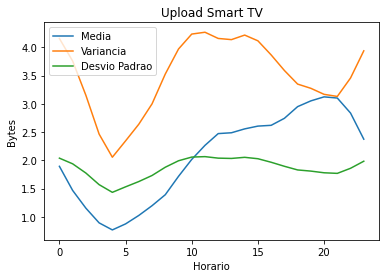

In [117]:
# Grafico Upload Smart TV
plt.title("Upload Smart TV")
plt.xlabel("Horario")
plt.ylabel("Bytes")

plt.plot(
    df_smart.groupby("horario_inteiro")["log_bytes_up"].mean(),
    label="Media")
plt.plot(
    df_smart.groupby("horario_inteiro")["log_bytes_up"].var(),
    label="Variancia")
plt.plot(
    df_smart.groupby("horario_inteiro")["log_bytes_up"].std(),
    label="Desvio Padrao"
)
plt.legend(loc="upper left")
plt.show()

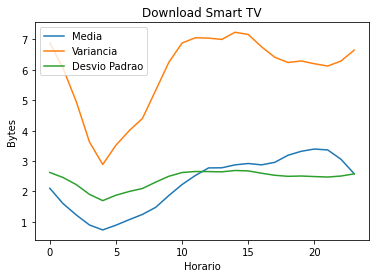

In [118]:
# Grafico Download Smart TV
plt.title("Download Smart TV")
plt.xlabel("Horario")
plt.ylabel("Bytes")

plt.plot(
    df_smart.groupby("horario_inteiro")["log_bytes_down"].mean(),
    label="Media")
plt.plot(
    df_smart.groupby("horario_inteiro")["log_bytes_down"].var(),
    label="Variancia")
plt.plot(
    df_smart.groupby("horario_inteiro")["log_bytes_down"].std(),
    label="Desvio Padrao"
)
plt.legend(loc="upper left")
plt.show()

### Boxplot

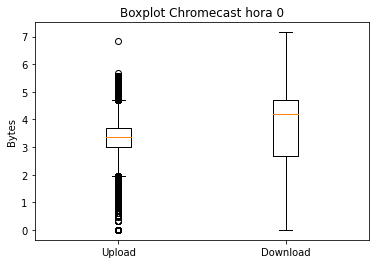

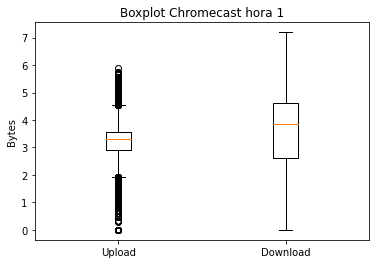

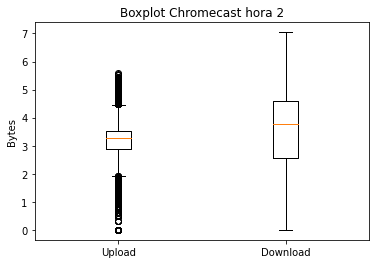

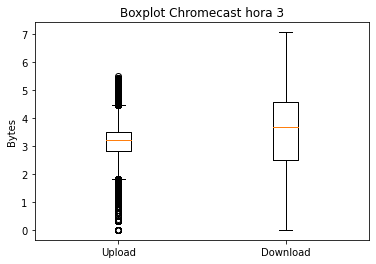

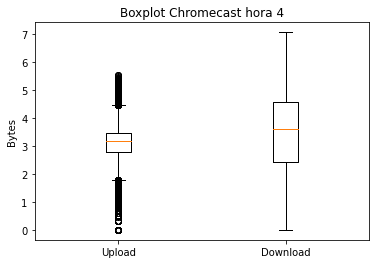

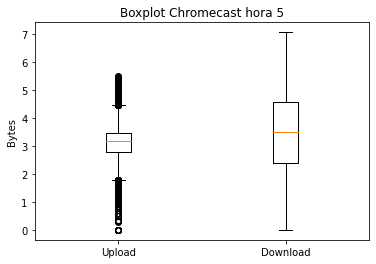

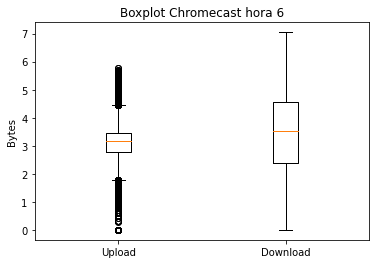

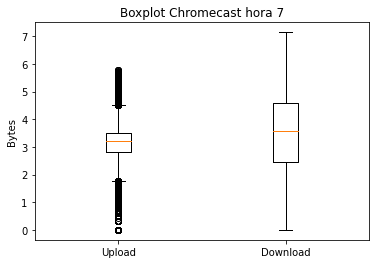

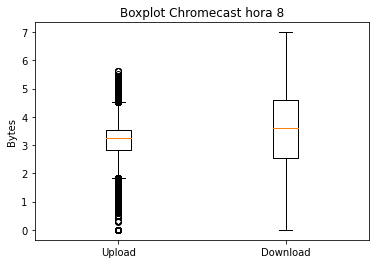

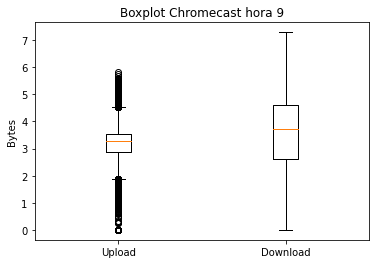

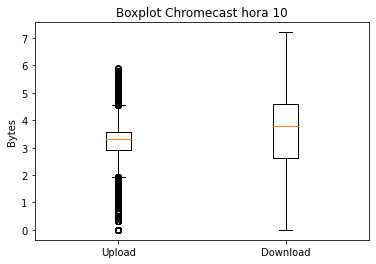

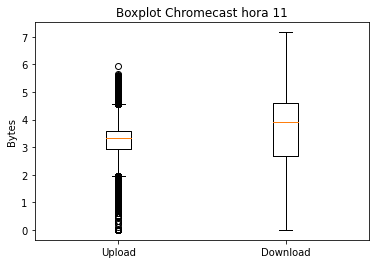

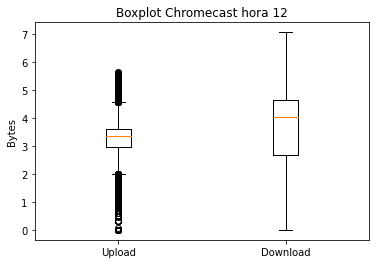

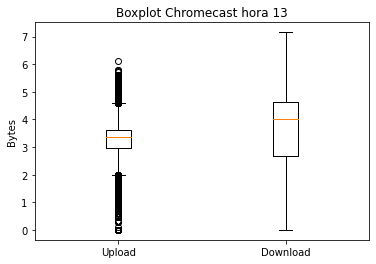

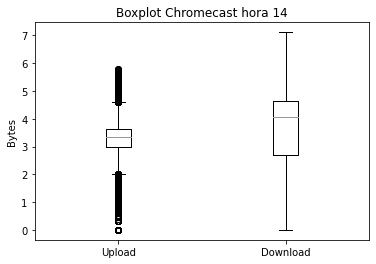

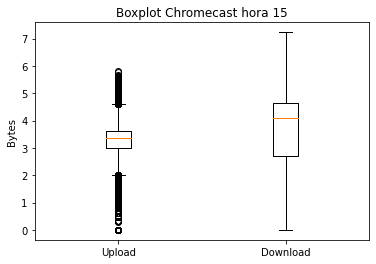

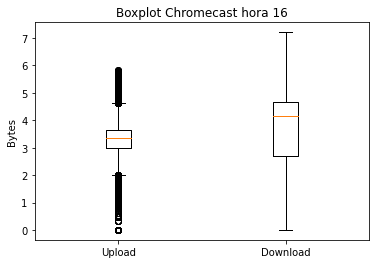

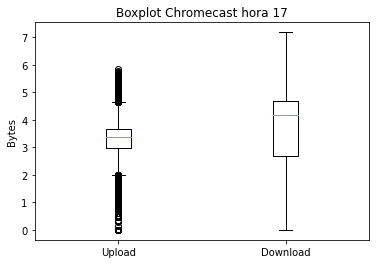

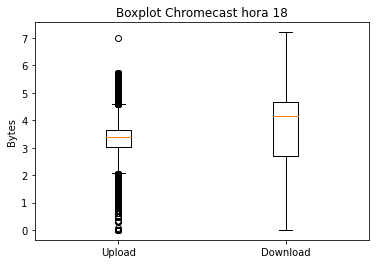

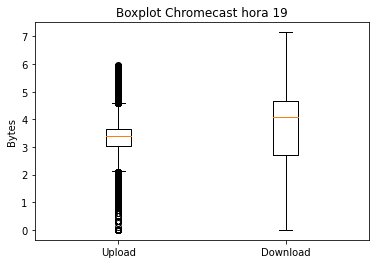

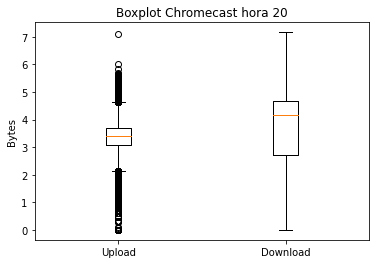

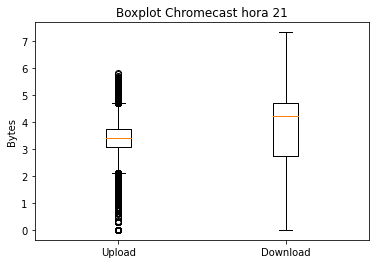

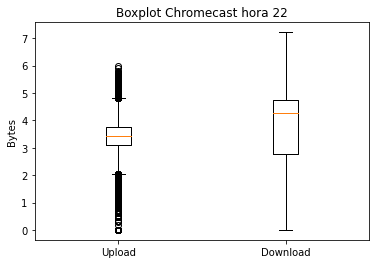

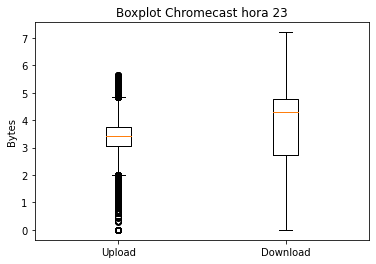

In [119]:
# Boxplot Chromecast

for horario in range(0,24):
    plt.boxplot([
        df_chromecast[df_chromecast["horario_inteiro"] == horario]["log_bytes_up"],
        df_chromecast[df_chromecast["horario_inteiro"] == horario]["log_bytes_down"],
    ],
    labels = ["Upload", "Download"]
    )
    plt.title(f"Boxplot Chromecast hora {horario}")
    plt.ylabel("Bytes")
    plt.show()

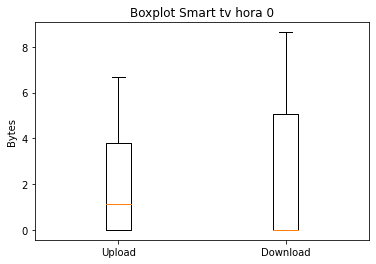

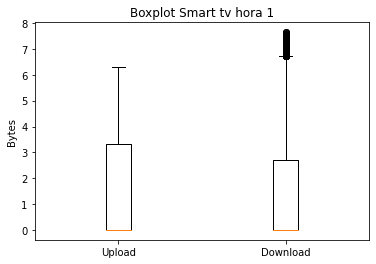

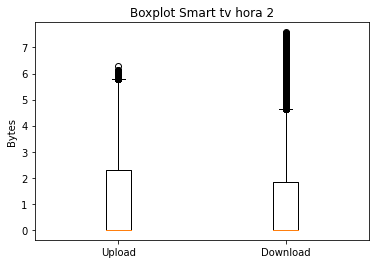

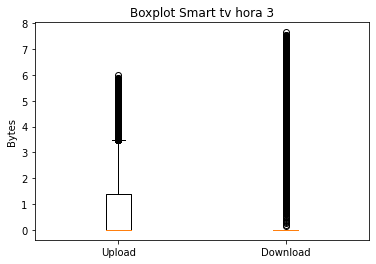

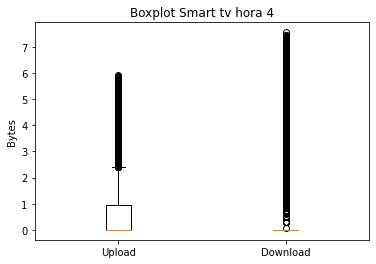

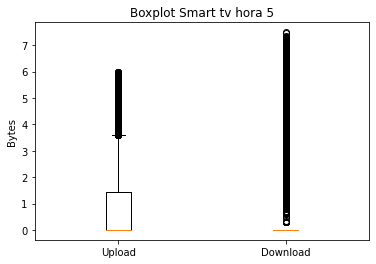

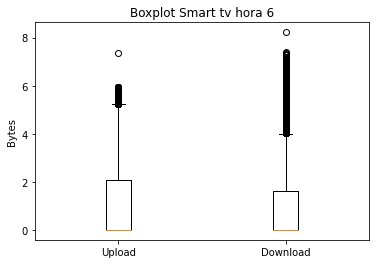

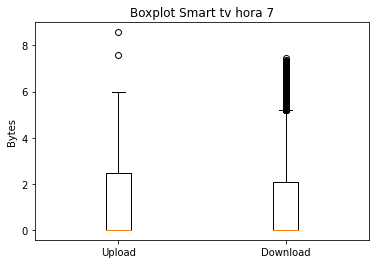

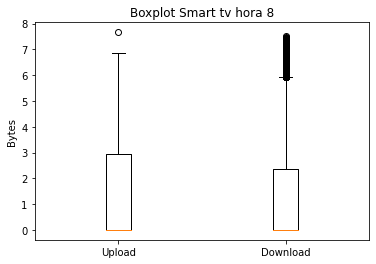

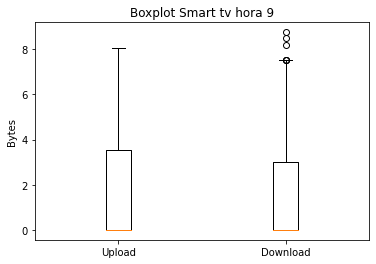

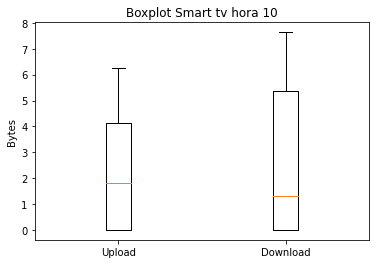

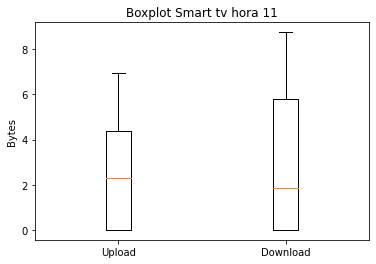

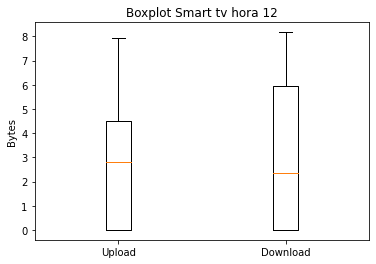

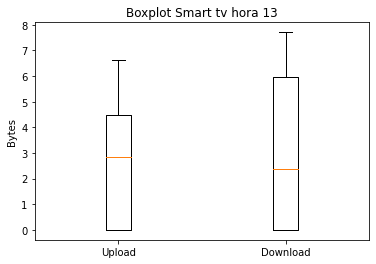

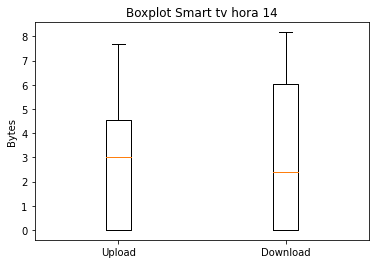

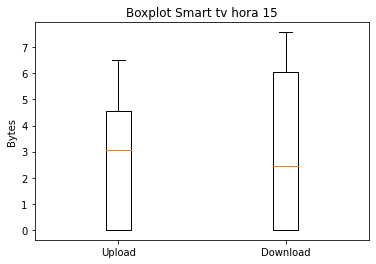

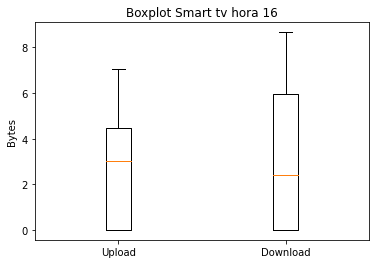

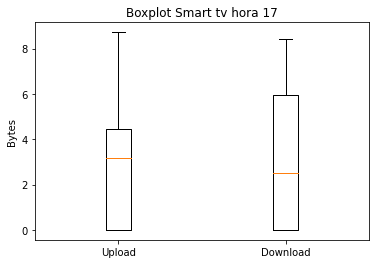

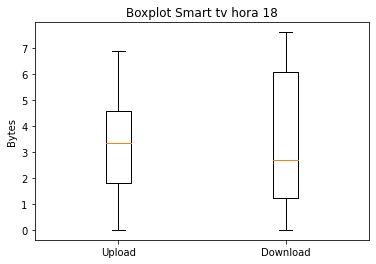

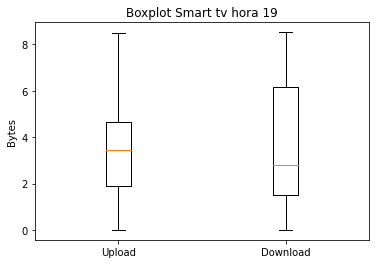

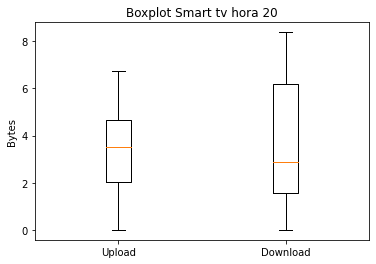

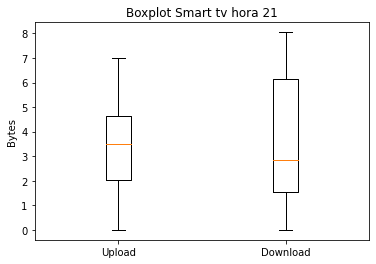

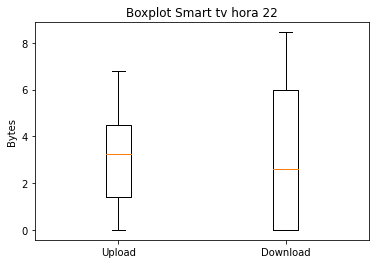

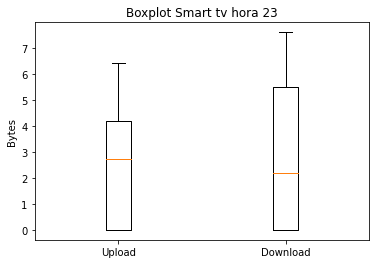

In [120]:
# Boxplot Smart TV

for horario in range(0,24):
    plt.boxplot([
        df_smart[df_smart["horario_inteiro"] == horario]["log_bytes_up"],
        df_smart[df_smart["horario_inteiro"] == horario]["log_bytes_down"],
    ],
    labels = ["Upload", "Download"]
    )
    plt.title(f"Boxplot Smart tv hora {horario}")
    plt.ylabel("Bytes")
    plt.show()

## 4) Caracterizando os horários com maior valor de tráfego

### Maior média e mediana e histogramas

In [121]:
hora_set1 = df_smart.groupby("horario_inteiro")["log_bytes_up"].median().idxmax()
hora_set2 = df_smart.groupby("horario_inteiro")["log_bytes_up"].mean().idxmax()
hora_set3 = df_smart.groupby("horario_inteiro")["log_bytes_down"].median().idxmax()
hora_set4 = df_smart.groupby("horario_inteiro")["log_bytes_down"].mean().idxmax()
hora_set5 = df_chromecast.groupby("horario_inteiro")["log_bytes_up"].median().idxmax()
hora_set6 = df_chromecast.groupby("horario_inteiro")["log_bytes_up"].mean().idxmax()
hora_set7 = df_chromecast.groupby("horario_inteiro")["log_bytes_down"].median().idxmax()
hora_set8 = df_chromecast.groupby("horario_inteiro")["log_bytes_down"].mean().idxmax()

In [122]:
set1 = df_smart.where(df_smart["horario_inteiro"] == hora_set1).dropna()
set2 = df_smart.where(df_smart["horario_inteiro"] == hora_set2).dropna()
set3 = df_smart.where(df_smart["horario_inteiro"] == hora_set3).dropna()
set4 = df_smart.where(df_smart["horario_inteiro"] == hora_set4).dropna()
set5 = df_chromecast.where(df_chromecast["horario_inteiro"] == hora_set5).dropna()
set6 = df_chromecast.where(df_chromecast["horario_inteiro"] == hora_set6).dropna()
set7 = df_chromecast.where(df_chromecast["horario_inteiro"] == hora_set7).dropna()
set8 = df_chromecast.where(df_chromecast["horario_inteiro"] == hora_set8).dropna()

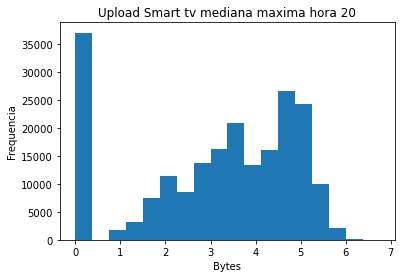

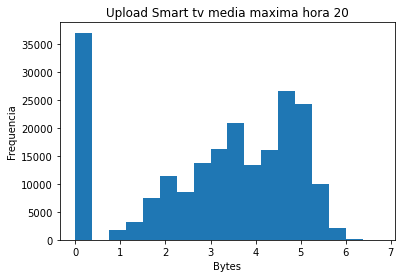

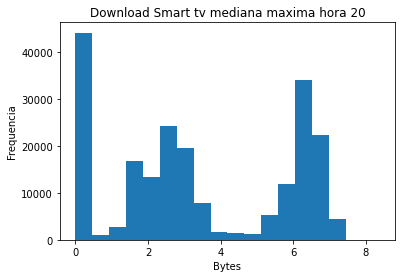

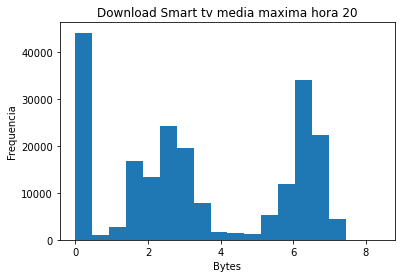

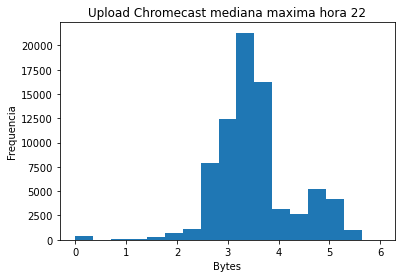

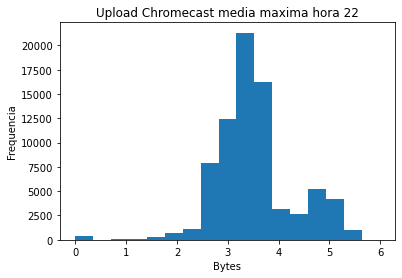

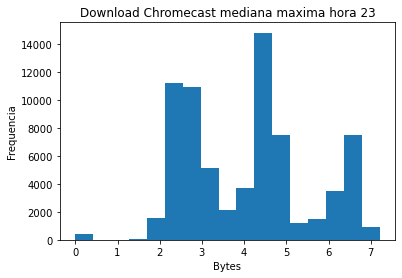

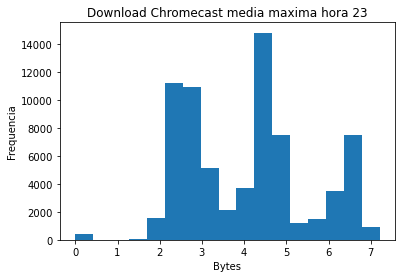

In [126]:
for dataset,log_bytes,hora,nome in [
    (set1,"log_bytes_up",hora_set1,f"Upload Smart tv mediana maxima hora {hora_set1}"),
    (set2,"log_bytes_up",hora_set2,f"Upload Smart tv media maxima hora {hora_set2}"),
    (set3,"log_bytes_down",hora_set3,f"Download Smart tv mediana maxima hora {hora_set3}"),
    (set4,"log_bytes_down",hora_set4,f"Download Smart tv media maxima hora {hora_set4}"),
    (set5,"log_bytes_up",hora_set5,f"Upload Chromecast mediana maxima hora {hora_set5}"),
    (set6,"log_bytes_up",hora_set6,f"Upload Chromecast media maxima hora {hora_set6}"),
    (set7,"log_bytes_down",hora_set7,f"Download Chromecast mediana maxima hora {hora_set7}"),
    (set8,"log_bytes_down",hora_set8,f"Download Chromecast media maxima hora {hora_set8}"),
    ]:
    plt.title(nome)
    plt.hist(dataset[log_bytes],bins = get_bin(dataset[log_bytes]))
    plt.xlabel("Bytes")
    plt.ylabel("Frequencia")
    plt.show()

### MLE

In [127]:
from scipy.stats import gamma, norm, probplot, power_divergence, pearsonr 
import math

### Gaussiana

In [128]:
# Sabe-se que a MLE para uma distribuição normal parametrizada por N(mean,std^2)
# é representada simplesmente por mean = média dos dados e std^2 = variância dos dados

media1 = set1["log_bytes_up"].mean()
variancia1 = set1["log_bytes_up"].var()
print(f" Dataset 1 MLE : mean = {media1}, variance = {variancia1}")

media2 = set2["log_bytes_up"].mean()
variancia2 = set2["log_bytes_up"].var()
print(f" Dataset 2 MLE : mean = {media2}, variance = {variancia2}")

media3 = set3["log_bytes_down"].mean()
variancia3 = set3["log_bytes_down"].var()
print(f" Dataset 3 MLE : mean = {media3}, variance = {variancia3}")

media4 = set4["log_bytes_down"].mean()
variancia4 = set4["log_bytes_down"].var()
print(f" Dataset 4 MLE : mean = {media4}, variance = {variancia4}")

media5 = set5["log_bytes_up"].mean()
variancia5 = set5["log_bytes_up"].var()
print(f" Dataset 5 MLE : mean = {media5}, variance = {variancia5}")

media6 = set6["log_bytes_up"].mean()
variancia6 = set6["log_bytes_up"].var()
print(f" Dataset 6 MLE : mean = {media6}, variance = {variancia6}")

media7 = set7["log_bytes_down"].mean()
variancia7 = set7["log_bytes_down"].var()
print(f" Dataset 7 MLE : mean = {media7}, variance = {variancia7}")

media8 = set8["log_bytes_down"].mean()
variancia8 = set8["log_bytes_down"].var()
print(f" Dataset 8 MLE : mean = {media8}, variance = {variancia8}")

 Dataset 1 MLE : mean = 3.124258107506702, variance = 3.168754576497257
 Dataset 2 MLE : mean = 3.124258107506702, variance = 3.168754576497257
 Dataset 3 MLE : mean = 3.396094556436504, variance = 6.201372584643251
 Dataset 4 MLE : mean = 3.396094556436504, variance = 6.201372584643251
 Dataset 5 MLE : mean = 3.521546370674621, variance = 0.5957195196375596
 Dataset 6 MLE : mean = 3.521546370674621, variance = 0.5957195196375596
 Dataset 7 MLE : mean = 4.05269811265878, variance = 2.1593891710121964
 Dataset 8 MLE : mean = 4.05269811265878, variance = 2.1593891710121964


### Gamma

In [130]:
# shape, loc e scale como parâmetros

shape1, loc1, scale1 = gamma.fit(set1["log_bytes_up"])
print(f"Dataset 1 MLE: shape = {shape1}, loc = {loc1}, scale = {scale1}")

shape2, loc2, scale2 = gamma.fit(set2["log_bytes_up"])
print(f"Dataset 2 MLE: shape = {shape2}, loc = {loc2}, scale = {scale2}")

shape3, loc3, scale3 = gamma.fit(set3["log_bytes_down"])
print(f"Dataset 3 MLE: shape = {shape3}, loc = {loc3}, scale = {scale3}")

shape4, loc4, scale4 = gamma.fit(set4["log_bytes_down"])
print(f"Dataset 4 MLE: shape = {shape4}, loc = {loc4}, scale = {scale4}")

shape5, loc5, scale5 = gamma.fit(set5["log_bytes_up"])
print(f"Dataset 5 MLE: shape = {shape5}, loc = {loc5}, scale = {scale5}")

shape6, loc6, scale6 = gamma.fit(set6["log_bytes_up"])
print(f"Dataset 6 MLE: shape = {shape6}, loc = {loc6}, scale = {scale6}")

shape7, loc7, scale7 = gamma.fit(set7["log_bytes_down"])
print(f"Dataset 7 MLE: shape = {shape7}, loc = {loc7}, scale = {scale7}")

shape8, loc8, scale8 = gamma.fit(set8["log_bytes_down"])
print(f"Dataset 8 MLE: shape = {shape8}, loc = {loc8}, scale = {scale8}")


Dataset 1 MLE: shape = 220.48073768362616, loc = -23.96174486447611, scale = 0.12272309565740211
Dataset 2 MLE: shape = 220.48073768362616, loc = -23.96174486447611, scale = 0.12272309565740211
Dataset 3 MLE: shape = 896.5469322463027, loc = -71.06216506397283, scale = 0.08304989773768084
Dataset 4 MLE: shape = 896.5469322463027, loc = -71.06216506397283, scale = 0.08304989773768084
Dataset 5 MLE: shape = 3148.8815211215233, loc = -39.80898262399852, scale = 0.013760617087012861
Dataset 6 MLE: shape = 3148.8815211215233, loc = -39.80898262399852, scale = 0.013760617087012861
Dataset 7 MLE: shape = 27.130143662628548, loc = -3.631368185066651, scale = 0.2832298335465073
Dataset 8 MLE: shape = 27.130143662628548, loc = -3.631368185066651, scale = 0.2832298335465073


### Graficos

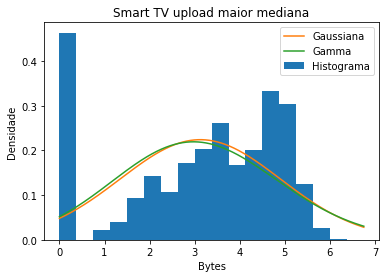

In [135]:
plt.title("Smart TV upload maior mediana")
plt.xlabel("Bytes")
plt.ylabel("Densidade")

plt.hist(set1["log_bytes_up"], bins = get_bin(set1["log_bytes_up"]), density = True)

x = np.linspace(set1["log_bytes_up"].min(),set1["log_bytes_up"].max(),len(set1["log_bytes_up"]))
y = norm.pdf(x,media1,math.sqrt(variancia1))
plt.plot(x,y)

y = gamma.pdf(x,shape1,loc1,scale1)
plt.plot(x,y)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

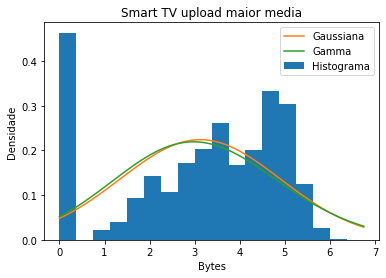

In [136]:
plt.title("Smart TV upload maior media")
plt.xlabel("Bytes")
plt.ylabel("Densidade")

plt.hist(set2["log_bytes_up"], bins = get_bin(set2["log_bytes_up"]), density = True)

x = np.linspace(set2["log_bytes_up"].min(),set2["log_bytes_up"].max(),len(set2["log_bytes_up"]))
y = norm.pdf(x,media2,math.sqrt(variancia2))
plt.plot(x,y)

y = gamma.pdf(x,shape2,loc2,scale2)
plt.plot(x,y)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

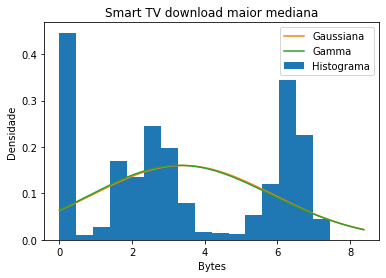

In [137]:
plt.title("Smart TV download maior mediana")
plt.xlabel("Bytes")
plt.ylabel("Densidade")

plt.hist(set3["log_bytes_down"], bins = get_bin(set3["log_bytes_down"]), density = True)

x = np.linspace(set3["log_bytes_down"].min(),set3["log_bytes_down"].max(),len(set3["log_bytes_down"]))
y = norm.pdf(x,media3,math.sqrt(variancia3))
plt.plot(x,y)

y = gamma.pdf(x,shape3,loc3,scale3)
plt.plot(x,y)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

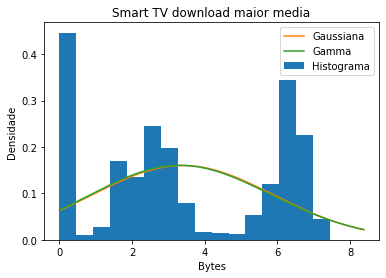

In [138]:
plt.title("Smart TV download maior media")
plt.xlabel("Bytes")
plt.ylabel("Densidade")

plt.hist(set4["log_bytes_down"], bins = get_bin(set4["log_bytes_down"]), density = True)

x = np.linspace(set4["log_bytes_down"].min(),set4["log_bytes_down"].max(),len(set4["log_bytes_down"]))
y = norm.pdf(x,media4,math.sqrt(variancia4))
plt.plot(x,y)

y = gamma.pdf(x,shape4,loc4,scale4)
plt.plot(x,y)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

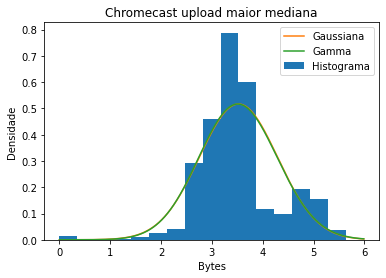

In [140]:
plt.title("Chromecast upload maior mediana")
plt.xlabel("Bytes")
plt.ylabel("Densidade")

plt.hist(set5["log_bytes_up"], bins = get_bin(set5["log_bytes_up"]), density = True)

x = np.linspace(set5["log_bytes_up"].min(),set5["log_bytes_up"].max(),len(set5["log_bytes_up"]))
y = norm.pdf(x,media5,math.sqrt(variancia5))
plt.plot(x,y)

y = gamma.pdf(x,shape5,loc5,scale5)
plt.plot(x,y)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

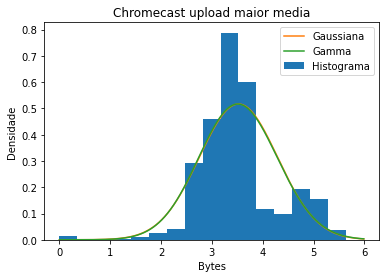

In [141]:
plt.title("Chromecast upload maior media")
plt.xlabel("Bytes")
plt.ylabel("Densidade")

plt.hist(set6["log_bytes_up"], bins = get_bin(set6["log_bytes_up"]), density = True)

x = np.linspace(set6["log_bytes_up"].min(),set6["log_bytes_up"].max(),len(set6["log_bytes_up"]))
y = norm.pdf(x,media6,math.sqrt(variancia6))
plt.plot(x,y)

y = gamma.pdf(x,shape6,loc6,scale6)
plt.plot(x,y)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

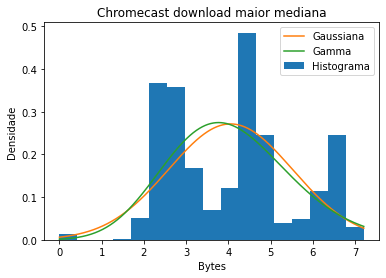

In [143]:
plt.title("Chromecast download maior mediana")
plt.xlabel("Bytes")
plt.ylabel("Densidade")

plt.hist(set7["log_bytes_down"], bins = get_bin(set7["log_bytes_down"]), density = True)

x = np.linspace(set7["log_bytes_down"].min(),set7["log_bytes_down"].max(),len(set7["log_bytes_down"]))
y = norm.pdf(x,media7,math.sqrt(variancia7))
plt.plot(x,y)

y = gamma.pdf(x,shape7,loc7,scale7)
plt.plot(x,y)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

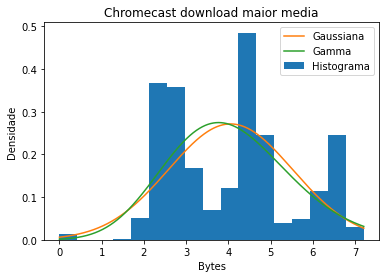

In [144]:
plt.title("Chromecast download maior media")
plt.xlabel("Bytes")
plt.ylabel("Densidade")

plt.hist(set8["log_bytes_down"], bins = get_bin(set8["log_bytes_down"]), density = True)

x = np.linspace(set8["log_bytes_down"].min(),set8["log_bytes_down"].max(),len(set8["log_bytes_down"]))
y = norm.pdf(x,media8,math.sqrt(variancia8))
plt.plot(x,y)

y = gamma.pdf(x,shape8,loc8,scale8)
plt.plot(x,y)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

### Probability Plot

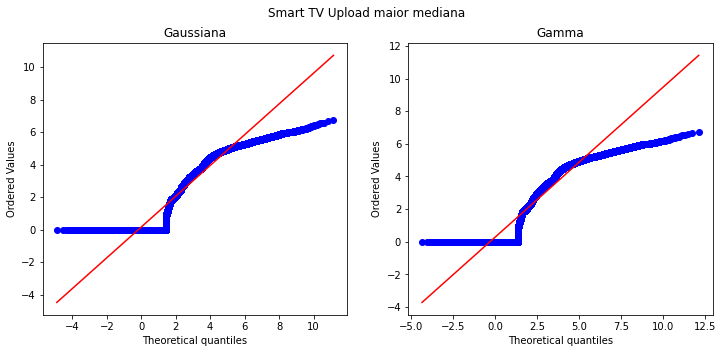

In [150]:
fig, axes = plt.subplots(1,2,figsize = (12,5))
fig.suptitle("Smart TV Upload maior mediana")

x = set1["log_bytes_up"]
probplot(x,sparams=(media1,math.sqrt(variancia1)),dist=norm,plot=axes[0])
probplot(x,sparams=(shape1,loc1,scale1),dist=gamma,plot=axes[1])

axes[0].set_title("Gaussiana")
axes[1].set_title("Gamma")
plt.show()

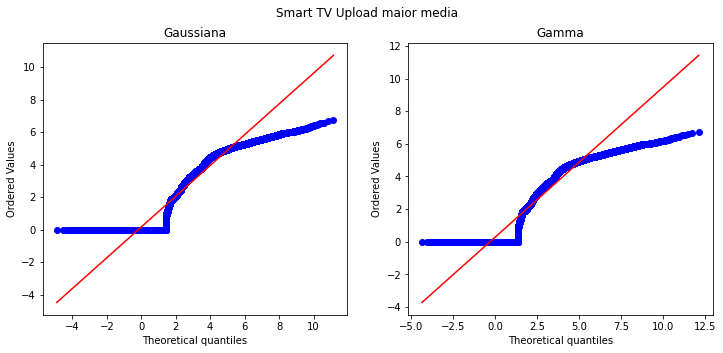

In [151]:
fig, axes = plt.subplots(1,2,figsize = (12,5))
fig.suptitle("Smart TV Upload maior media")

x = set2["log_bytes_up"]
probplot(x,sparams=(media2,math.sqrt(variancia2)),dist=norm,plot=axes[0])
probplot(x,sparams=(shape2,loc2,scale2),dist=gamma,plot=axes[1])

axes[0].set_title("Gaussiana")
axes[1].set_title("Gamma")
plt.show()

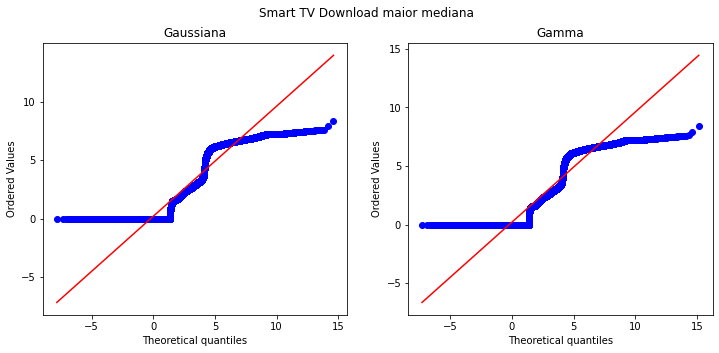

In [152]:
fig, axes = plt.subplots(1,2,figsize = (12,5))
fig.suptitle("Smart TV Download maior mediana")

x = set3["log_bytes_down"]
probplot(x,sparams=(media3,math.sqrt(variancia3)),dist=norm,plot=axes[0])
probplot(x,sparams=(shape3,loc3,scale3),dist=gamma,plot=axes[1])

axes[0].set_title("Gaussiana")
axes[1].set_title("Gamma")
plt.show()

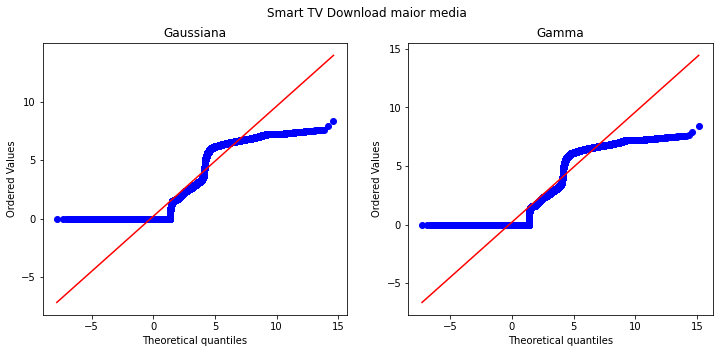

In [154]:
fig, axes = plt.subplots(1,2,figsize = (12,5))
fig.suptitle("Smart TV Download maior media")

x = set4["log_bytes_down"]
probplot(x,sparams=(media4,math.sqrt(variancia4)),dist=norm,plot=axes[0])
probplot(x,sparams=(shape4,loc4,scale4),dist=gamma,plot=axes[1])

axes[0].set_title("Gaussiana")
axes[1].set_title("Gamma")
plt.show()

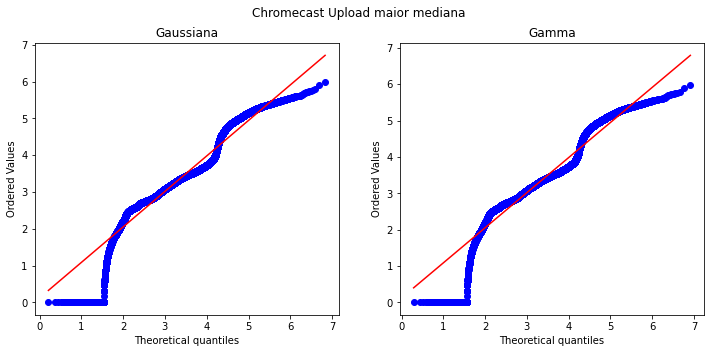

In [155]:
fig, axes = plt.subplots(1,2,figsize = (12,5))
fig.suptitle("Chromecast Upload maior mediana")

x = set5["log_bytes_up"]
probplot(x,sparams=(media5,math.sqrt(variancia5)),dist=norm,plot=axes[0])
probplot(x,sparams=(shape5,loc5,scale5),dist=gamma,plot=axes[1])

axes[0].set_title("Gaussiana")
axes[1].set_title("Gamma")
plt.show()

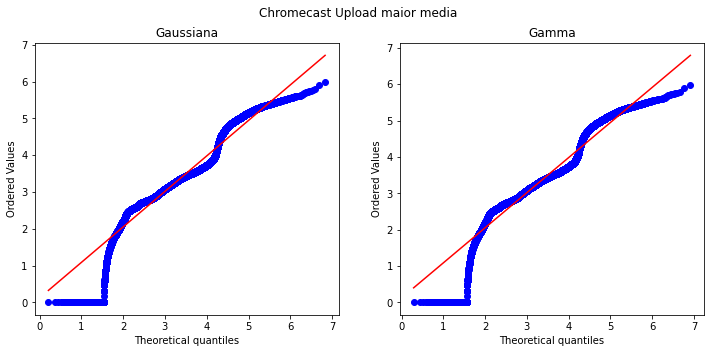

In [157]:
fig, axes = plt.subplots(1,2,figsize = (12,5))
fig.suptitle("Chromecast Upload maior media")

x = set6["log_bytes_up"]
probplot(x,sparams=(media6,math.sqrt(variancia6)),dist=norm,plot=axes[0])
probplot(x,sparams=(shape6,loc6,scale6),dist=gamma,plot=axes[1])

axes[0].set_title("Gaussiana")
axes[1].set_title("Gamma")
plt.show()

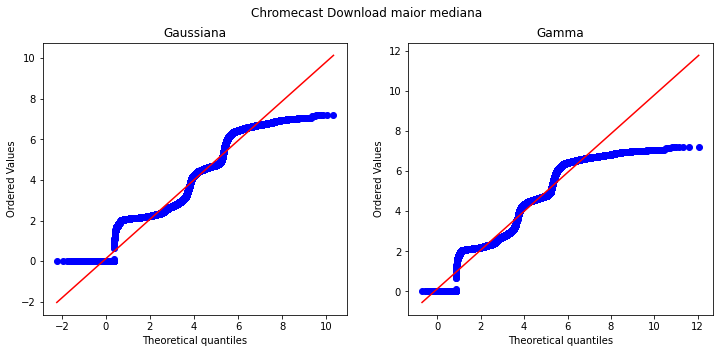

In [158]:
fig, axes = plt.subplots(1,2,figsize = (12,5))
fig.suptitle("Chromecast Download maior mediana")

x = set7["log_bytes_down"]
probplot(x,sparams=(media7,math.sqrt(variancia7)),dist=norm,plot=axes[0])
probplot(x,sparams=(shape7,loc7,scale7),dist=gamma,plot=axes[1])

axes[0].set_title("Gaussiana")
axes[1].set_title("Gamma")
plt.show()

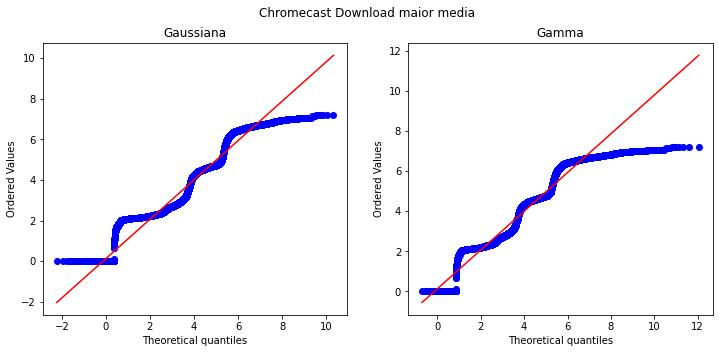

In [159]:
fig, axes = plt.subplots(1,2,figsize = (12,5))
fig.suptitle("Chromecast Download maior media")

x = set8["log_bytes_down"]
probplot(x,sparams=(media8,math.sqrt(variancia8)),dist=norm,plot=axes[0])
probplot(x,sparams=(shape8,loc8,scale8),dist=gamma,plot=axes[1])

axes[0].set_title("Gaussiana")
axes[1].set_title("Gamma")
plt.show()

## 5) Análise da correlação entre as taxas de upload e download para os horários com o maior valor de tráfego

Coeficiente de correlação amostral entre os datasets: 0.9156089964784178


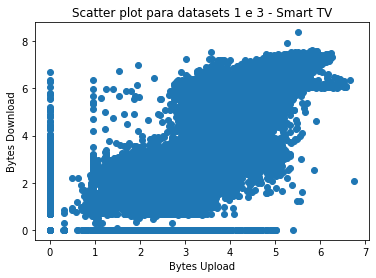

Coeficiente de correlação amostral entre os datasets: 0.9156089964784178


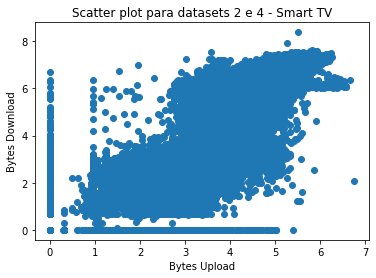

Coeficiente de correlação amostral entre os datasets: 0.7925043015217004


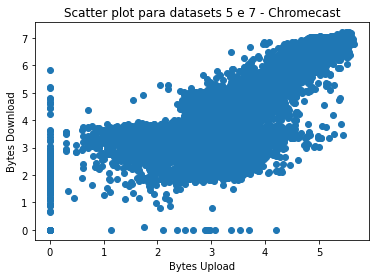

Coeficiente de correlação amostral entre os datasets: 0.7925043015217004


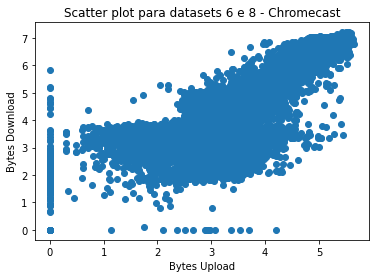

In [168]:
for nome, data1, data2 in [
    ("Scatter plot para datasets 1 e 3 - Smart TV", set1, set3),
    ("Scatter plot para datasets 2 e 4 - Smart TV", set2, set4),
    ("Scatter plot para datasets 5 e 7 - Chromecast", set7, set7),
    ("Scatter plot para datasets 6 e 8 - Chromecast", set8, set8),
]:
    # como os horários são diferentes para o caso do chromecast, podemos comparar os próprios 
    # sets 7 e 8 que estão relacionados com os horários obtidos para o tráfego de download
    coeficiente = pearsonr(data1["log_bytes_up"],data2["log_bytes_down"])
    print(f"Coeficiente de correlação amostral entre os datasets: {coeficiente[0]}")
    
    plt.scatter(data1["log_bytes_up"],data2["log_bytes_down"])
    plt.title(nome)
    plt.xlabel("Bytes Upload")
    plt.ylabel("Bytes Download")
    plt.show()